<a href="https://colab.research.google.com/github/chamaldev/SML-project/blob/main/Copy_of_SML_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

In [2]:
from google.colab import files
uploaded = files.upload()

# Select the file to open
file_name = list(uploaded.keys())[0]


url = 'D:\master program\Sem1\machine learning\group project\\training_data.csv'
df = pd.read_csv(file_name)
df


Saving training_data.csv to training_data.csv


hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1595            3            5      6        0        0           1  21.5   
1596           14            0      6        0        1           1  23.2   
1597           13            0      3        0        1           1  13.9   
1598           14            5      3        0        0           1  11.7   
1599           22            6      2        0        0           0   4.2   

       dew  humidity  precip  snow  snowdepth  windspeed  cloudcover  \
0    -15.0     53.68   0.000     0        0.0       16.3        31.6   
1    -12.8     40.97   0.000     0        0.0       23.9        85.7   
2     21.8     73.39   0.000     0        0.0        0.0        81.1   
3     -4.0     59.74   0.000     0        0.0       19.2         0.0   
4    -11.4     18.71   0.000     0        0.0       10.5        44.6   
...    ...       ...     ...   ...        ...        ...         ...   
1595  19.4     87.68   0.000     0        0.0       10.6        24.4   
1596  20.1     82.43   2.217     0        0.0        9.8        92.1   
1597  -2.2     32.93   0.000     0        2.0       18.2        79.3   
1598  -9.3     22.09   0.000     0        0.0        5.8        24.4   
1599   1.7     84.11   1.081     0        0.0       21.9        97.4   

      visibility    increase_stock  
0           16.0   low_bike_demand  
1           16.0   low_bike_demand  
2           16.0   low_bike_demand  
3           16.0   low_bike_demand  
4           16.0   low_bike_demand  
...          ...               ...  
1595        16.0   low_bike_demand  
1596        10.4   low_bike_demand  
1597        16.0   low_bike_demand  
1598        16.0  high_bike_demand  
1599        16.0   low_bike_demand  

[1600 rows x 16 columns]

In [3]:
df.shape


(1600, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [ ]:
df.describe()


hour_of_day  day_of_week        month      holiday      weekday  \
count   1600.00000  1600.000000  1600.000000  1600.000000  1600.000000   
mean      11.37125     3.022500     6.468750     0.033125     0.710000   
std        6.94837     2.012965     3.454741     0.179019     0.453904   
min        0.00000     0.000000     1.000000     0.000000     0.000000   
25%        5.00000     1.000000     3.000000     0.000000     0.000000   
50%       12.00000     3.000000     6.000000     0.000000     1.000000   
75%       17.00000     5.000000     9.000000     0.000000     1.000000   
max       23.00000     6.000000    12.000000     1.000000     1.000000   

       summertime         temp          dew     humidity       precip    snow  \
count  1600.00000  1600.000000  1600.000000  1600.000000  1600.000000  1600.0   
mean      0.64375    15.210313     7.750750    63.927844     0.122042     0.0   
std       0.47904     9.264785    10.026459    19.079419     0.920600     0.0   
min       0.00000    -9.100000   -18.400000    15.850000     0.000000     0.0   
25%       0.00000     7.700000    -0.800000    47.845000     0.000000     0.0   
50%       1.00000    15.500000     8.300000    65.175000     0.000000     0.0   
75%       1.00000    23.200000    16.800000    79.955000     0.000000     0.0   
max       1.00000    35.600000    24.300000    99.890000    25.871000     0.0   

         snowdepth    windspeed   cloudcover   visibility  
count  1600.000000  1600.000000  1600.000000  1600.000000  
mean      0.042713    13.082500    64.322375    15.344125  
std       0.421198     7.756652    32.748869     2.323737  
min       0.000000     0.000000     0.000000     0.100000  
25%       0.000000     7.500000    28.800000    16.000000  
50%       0.000000    12.300000    79.300000    16.000000  
75%       0.000000    17.600000    92.800000    16.000000  
max       6.710000    43.800000   100.000000    16.000000

In [ ]:
df.columns


Index(['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday',
       'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth',
       'windspeed', 'cloudcover', 'visibility', 'increase_stock'],
      dtype='object')

In [ ]:
df.isnull()

hour_of_day  day_of_week  month  holiday  weekday  summertime   temp  \
0           False        False  False    False    False       False  False   
1           False        False  False    False    False       False  False   
2           False        False  False    False    False       False  False   
3           False        False  False    False    False       False  False   
4           False        False  False    False    False       False  False   
...           ...          ...    ...      ...      ...         ...    ...   
1595        False        False  False    False    False       False  False   
1596        False        False  False    False    False       False  False   
1597        False        False  False    False    False       False  False   
1598        False        False  False    False    False       False  False   
1599        False        False  False    False    False       False  False   

        dew  humidity  precip   snow  snowdepth  windspeed  cloudcover  \
0     False     False   False  False      False      False       False   
1     False     False   False  False      False      False       False   
2     False     False   False  False      False      False       False   
3     False     False   False  False      False      False       False   
4     False     False   False  False      False      False       False   
...     ...       ...     ...    ...        ...        ...         ...   
1595  False     False   False  False      False      False       False   
1596  False     False   False  False      False      False       False   
1597  False     False   False  False      False      False       False   
1598  False     False   False  False      False      False       False   
1599  False     False   False  False      False      False       False   

      visibility  increase_stock  
0          False           False  
1          False           False  
2          False           False  
3          False           False  
4          False           False  
...          ...             ...  
1595       False           False  
1596       False           False  
1597       False           False  
1598       False           False  
1599       False           False  

[1600 rows x 16 columns]

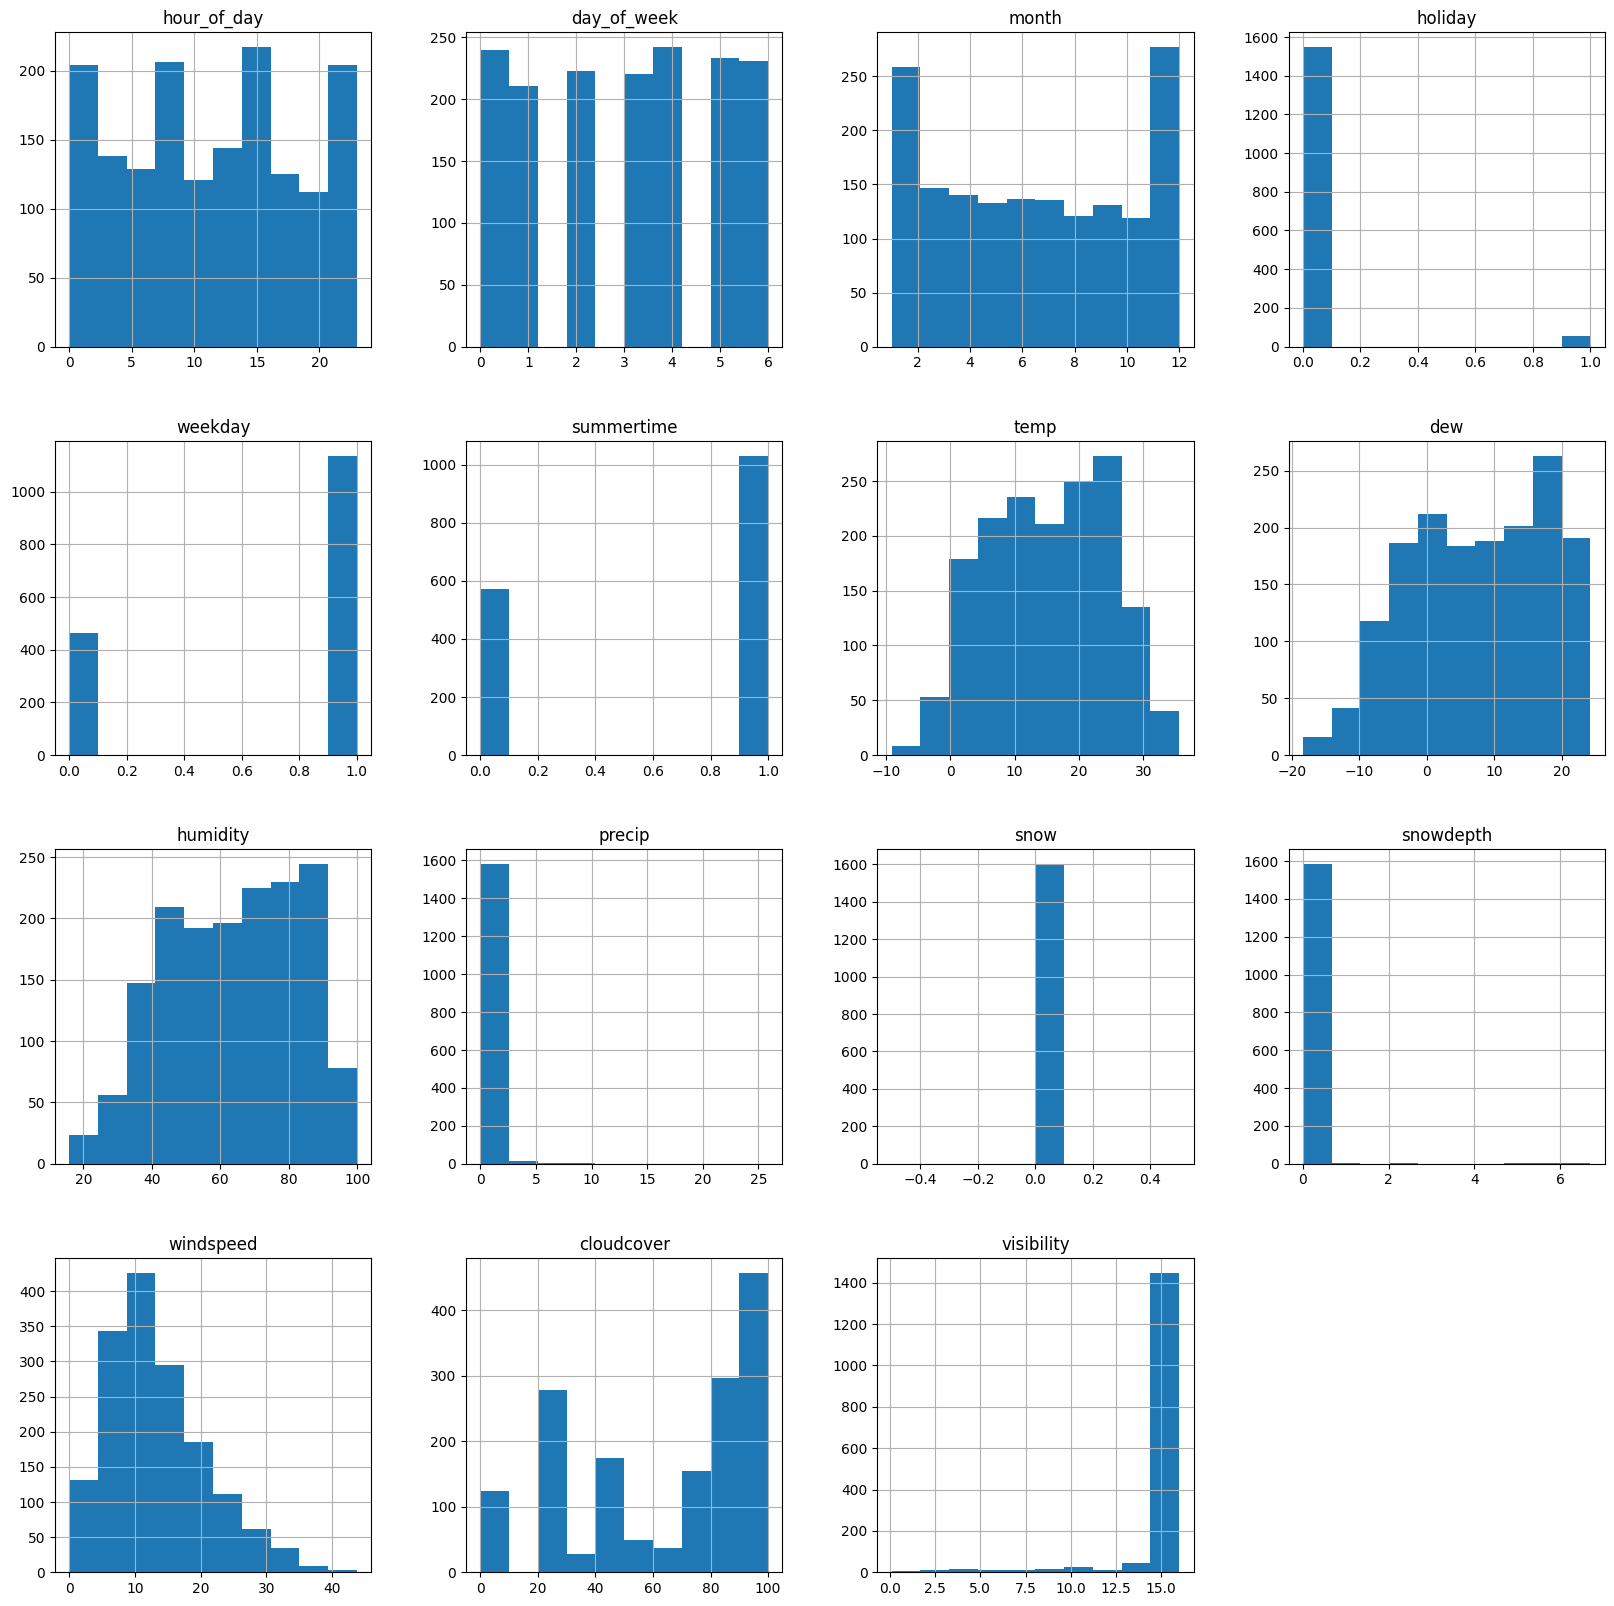

In [ ]:
plt= df.hist(figsize=(20,20))

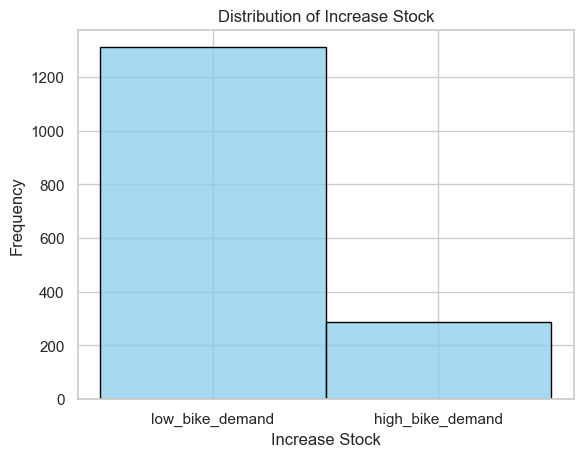

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
increase_stock_categories = df['increase_stock']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for the "increase_stock" column
sns.histplot(data=df, x='increase_stock', color='skyblue', edgecolor='black', discrete=True)

# Adding labels and title
plt.xlabel('Increase Stock')
plt.ylabel('Frequency')
plt.title('Distribution of Increase Stock')

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


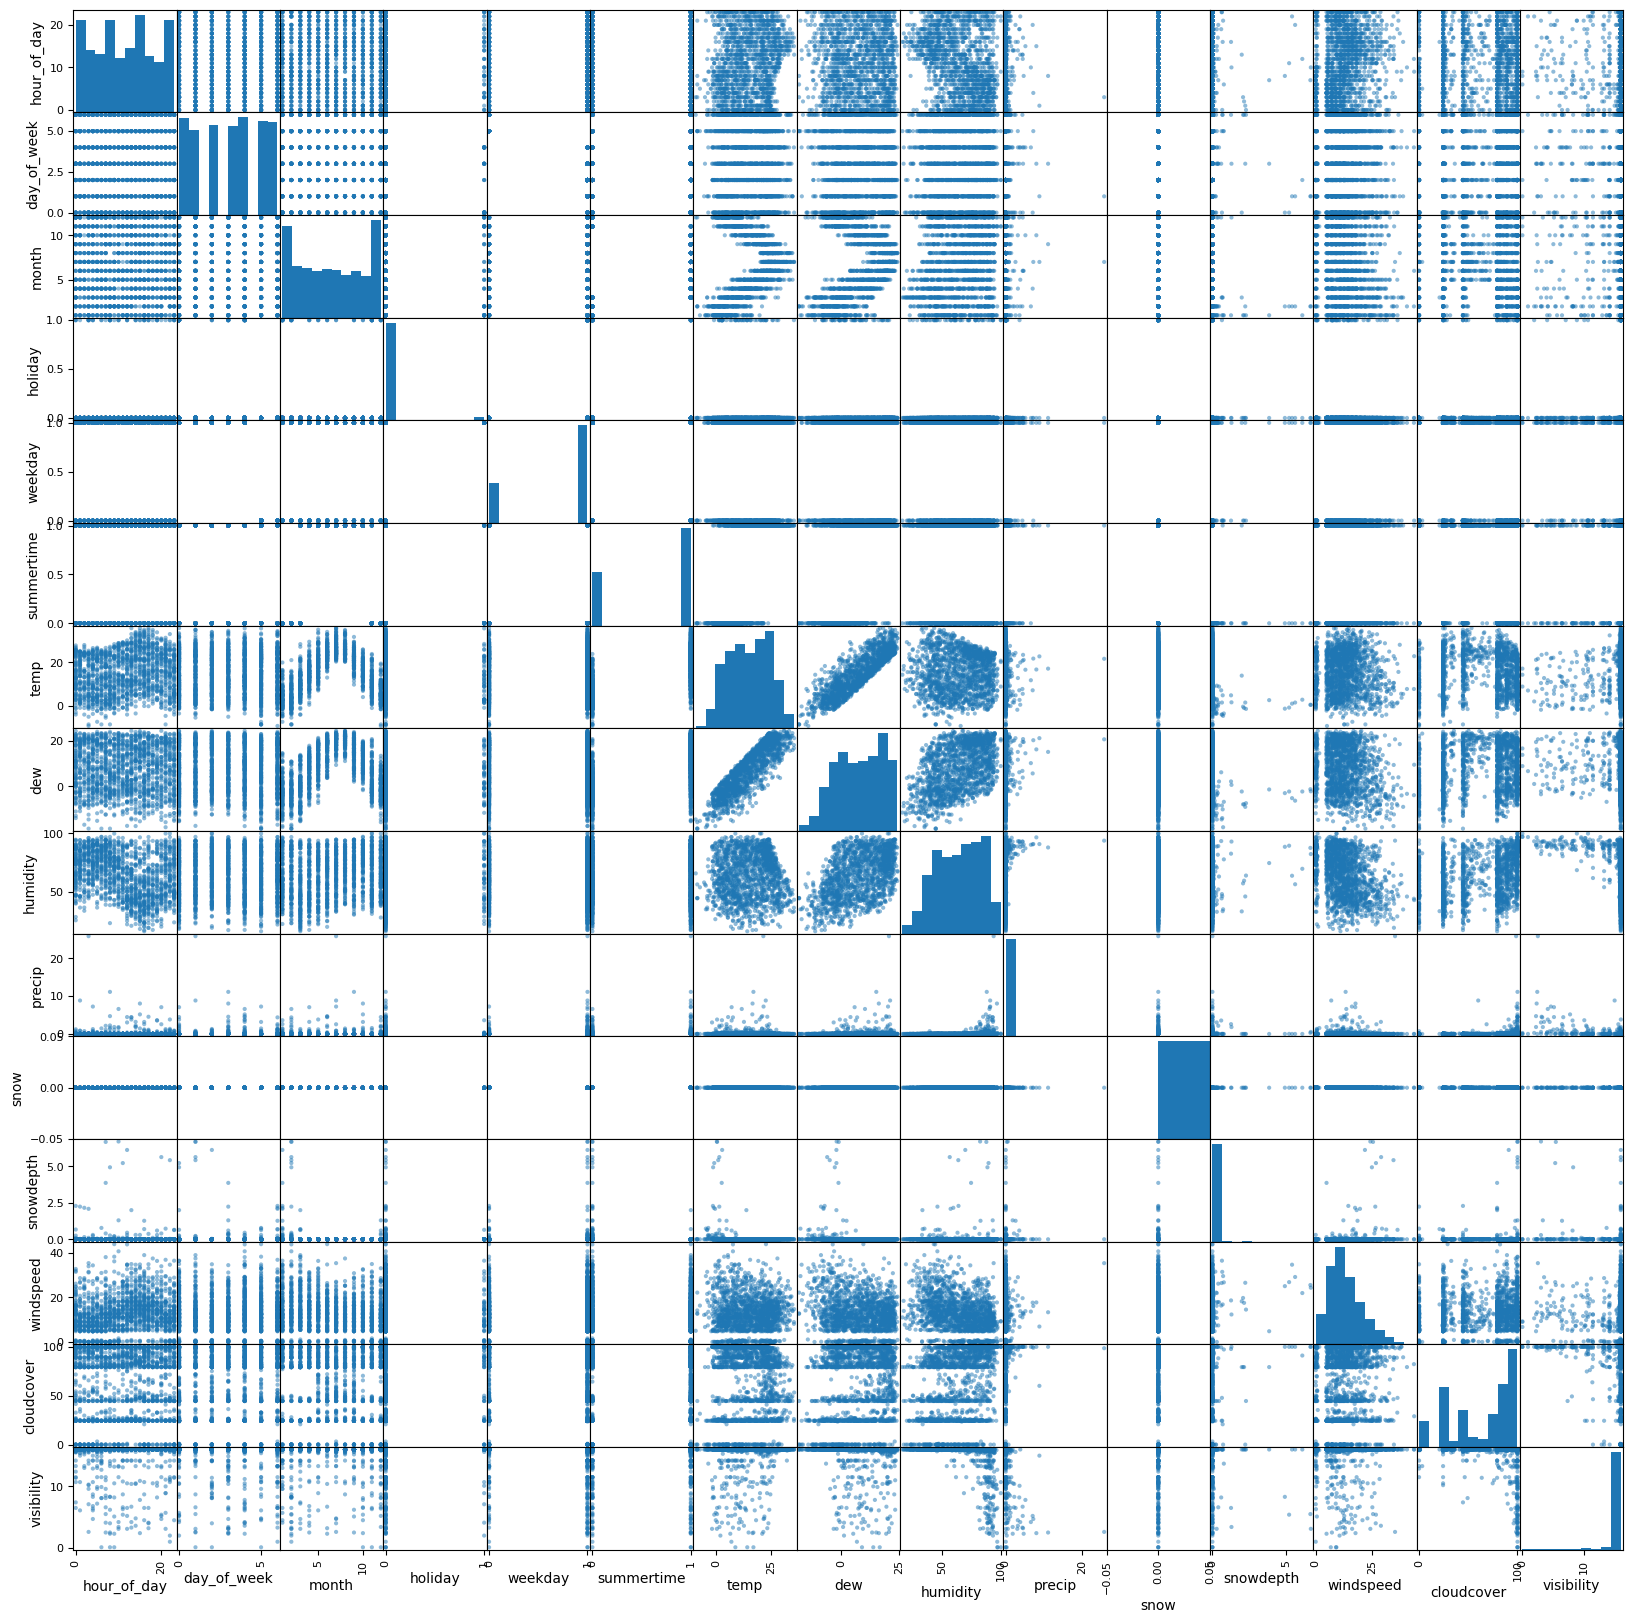

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
scatter_matrix(df, figsize=(20, 20))
plt.show()


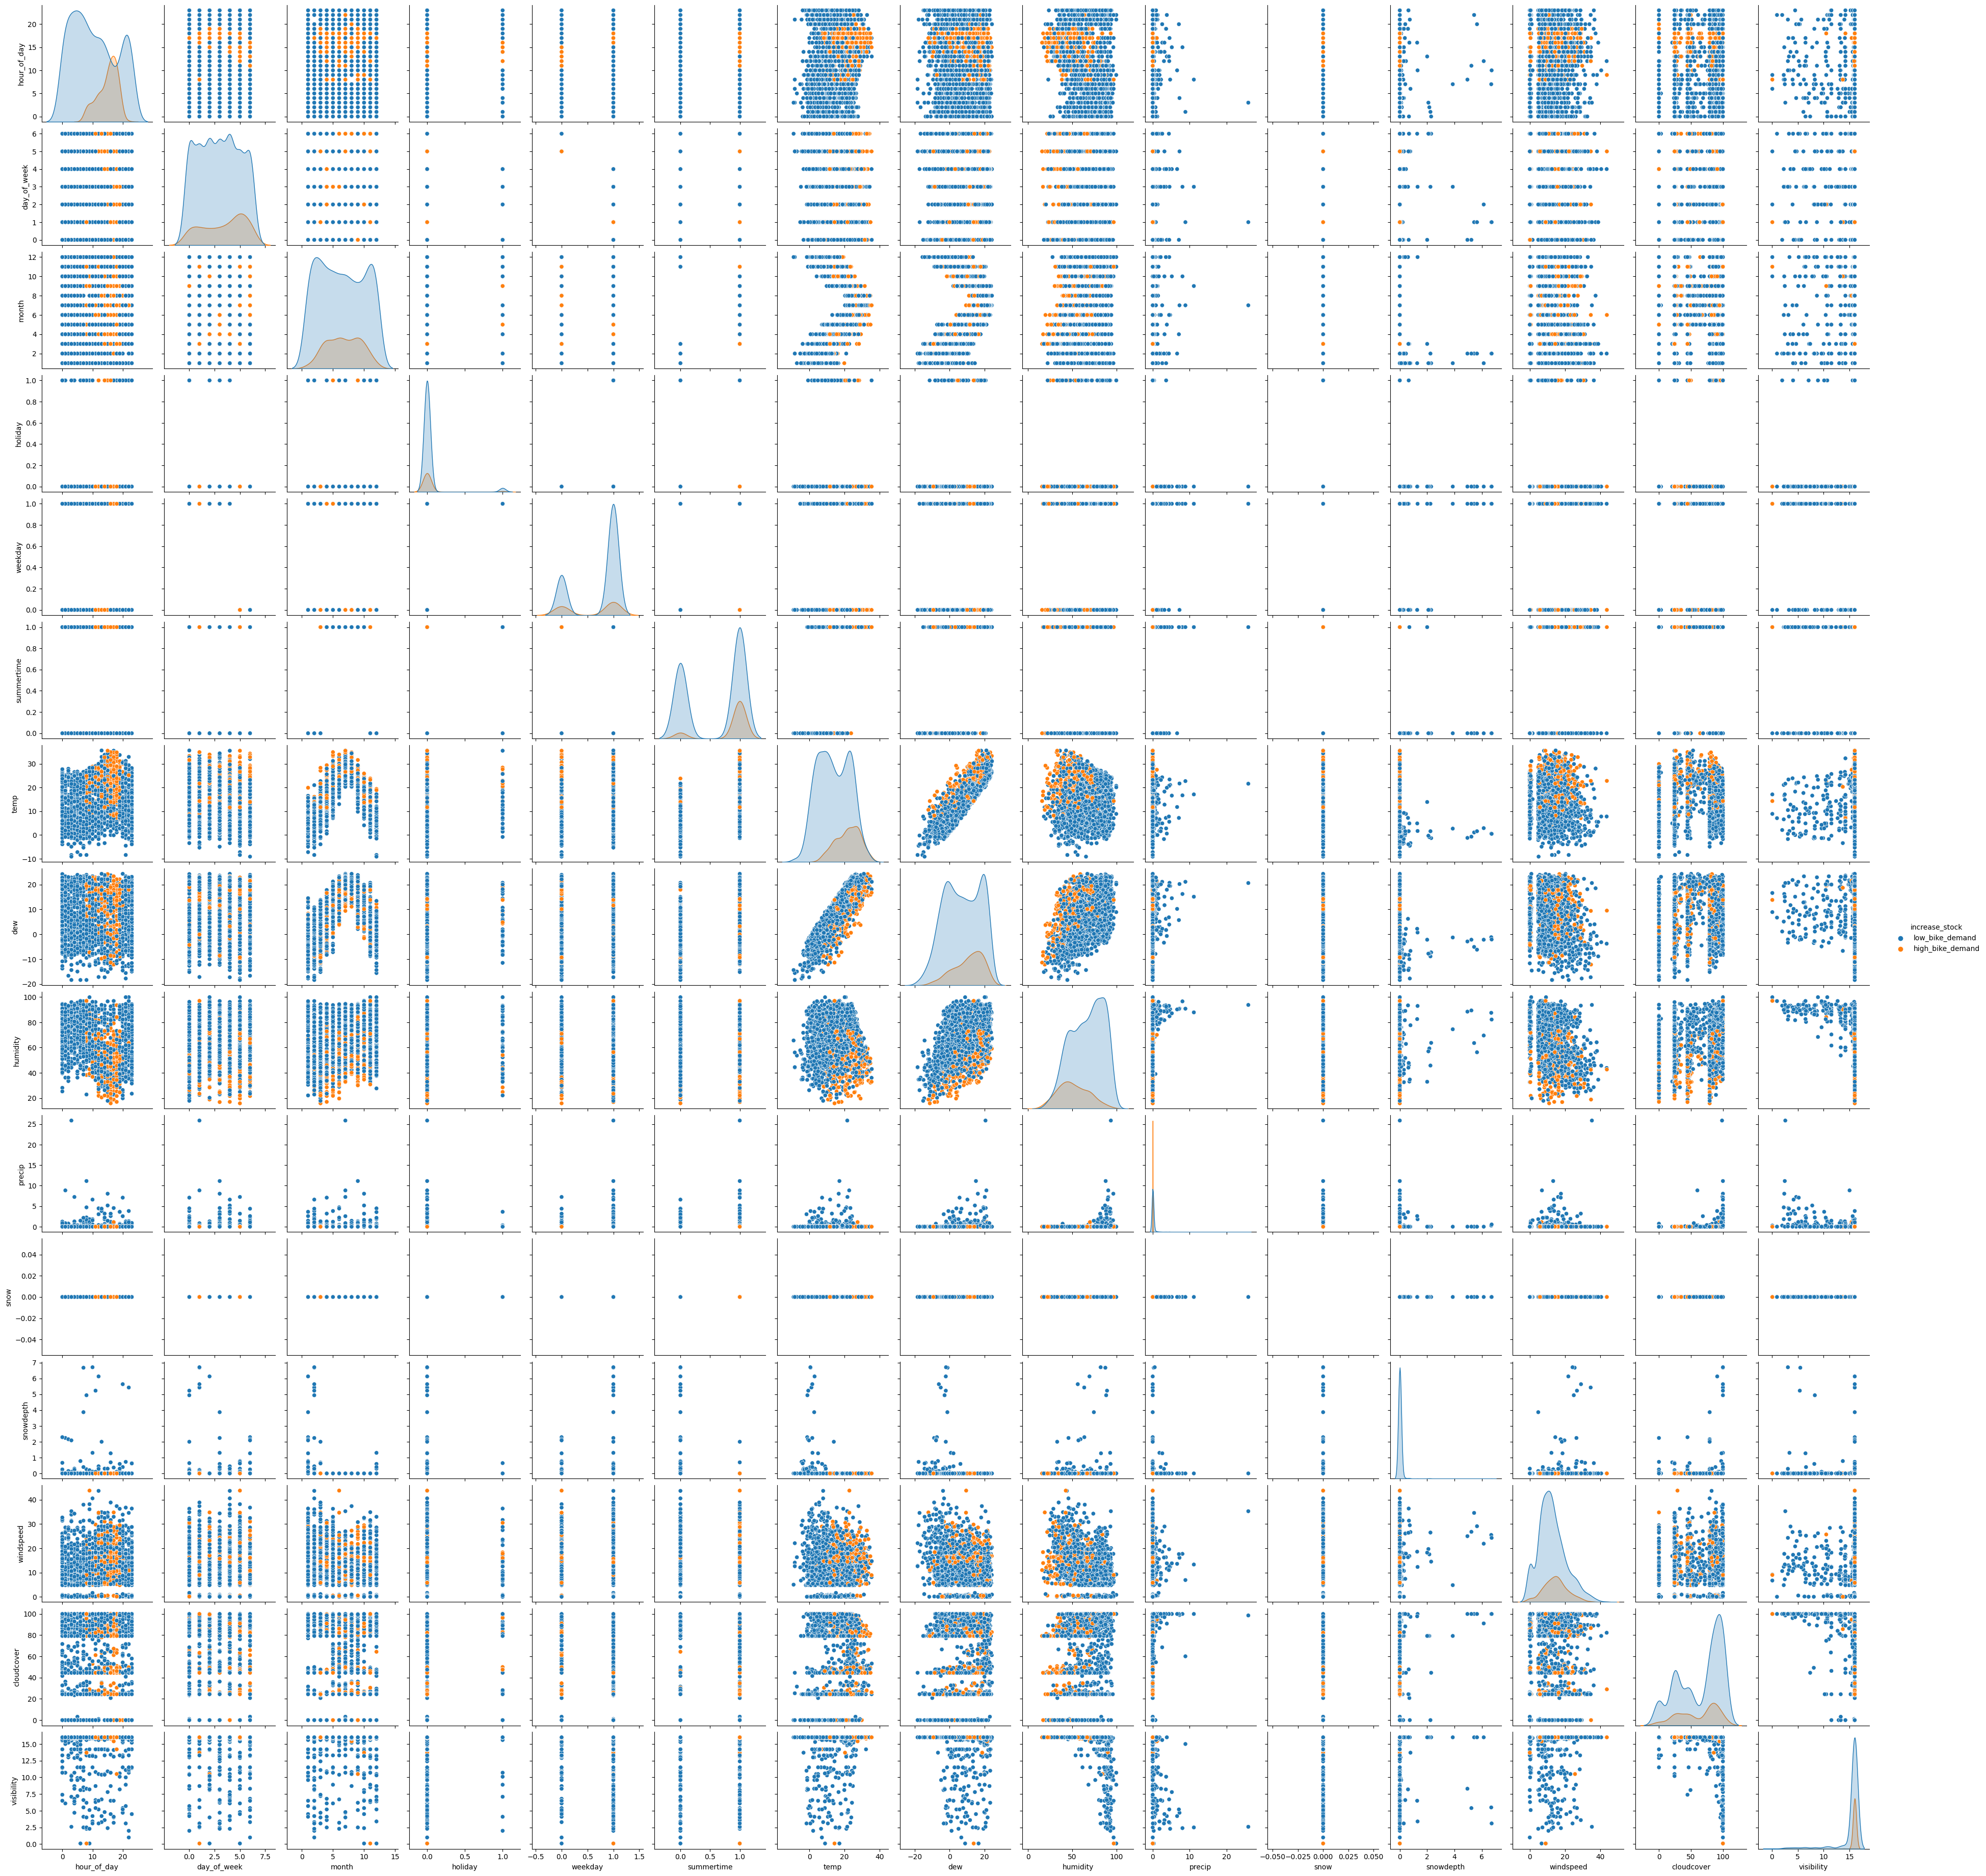

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.pairplot(df, hue='increase_stock')
plt.show()

<ipython-input-31-5f5a24c02296>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')


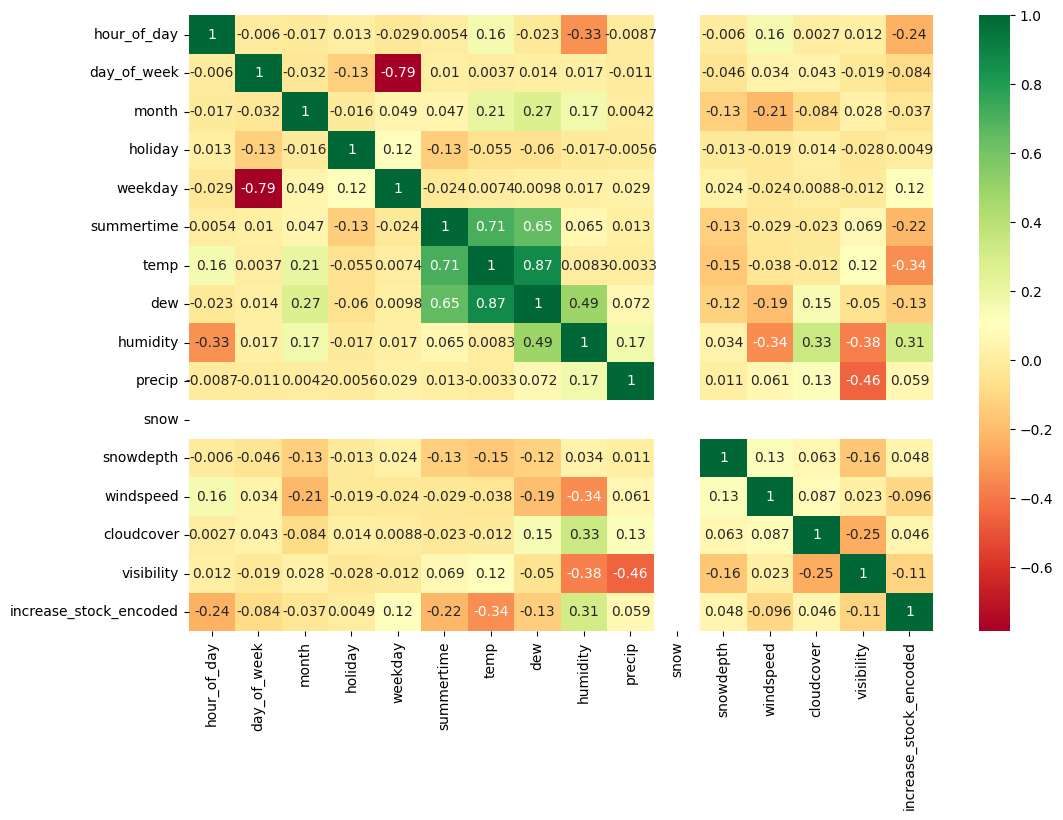

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame named 'df'

# Encode the categorical column 'increase_stock'
df['increase_stock_encoded'] = df['increase_stock'].astype('category').cat.codes

# Set the figure size
plt.figure(figsize=(12, 8))

# Generate a heatmap including the encoded categorical column
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

# Show the plot
plt.show()


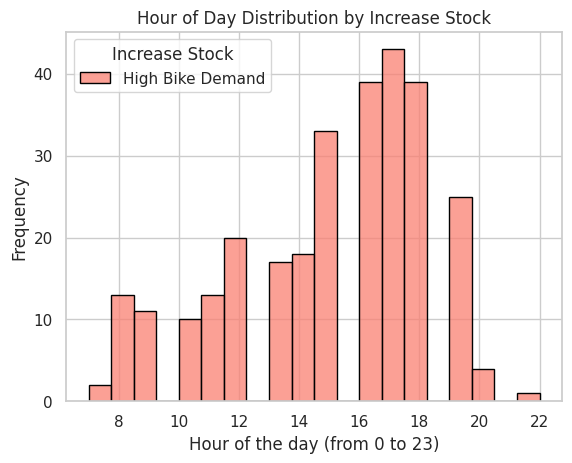

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
Hrs_of_day = df['hour_of_day']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'hour_of_day': Hrs_of_day, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
#sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='hour_of_day', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='hour_of_day', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Hour of the day (from 0 to 23)')
plt.ylabel('Frequency')
plt.title('Hour of Day Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


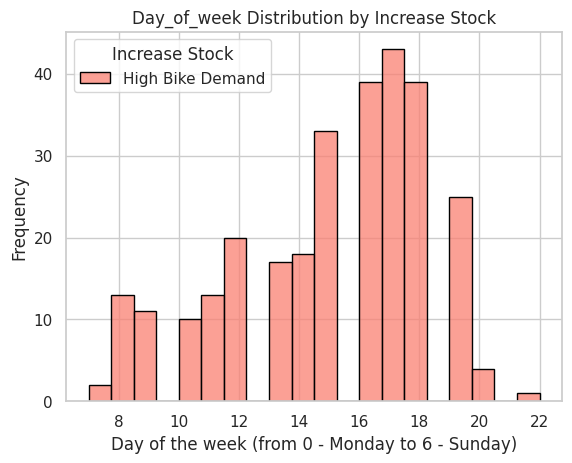

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
day_of_week = df['day_of_week']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'day_of_week': Hrs_of_day, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='day_of_week', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Day of the week (from 0 - Monday to 6 - Sunday)')
plt.ylabel('Frequency')
plt.title('Day_of_week Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


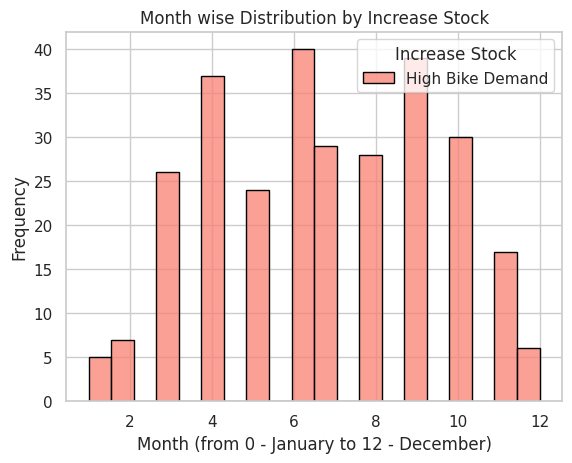

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
month = df['month']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'month': month, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='month', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Month (from 0 - January to 12 - December)')
plt.ylabel('Frequency')
plt.title('Month wise Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


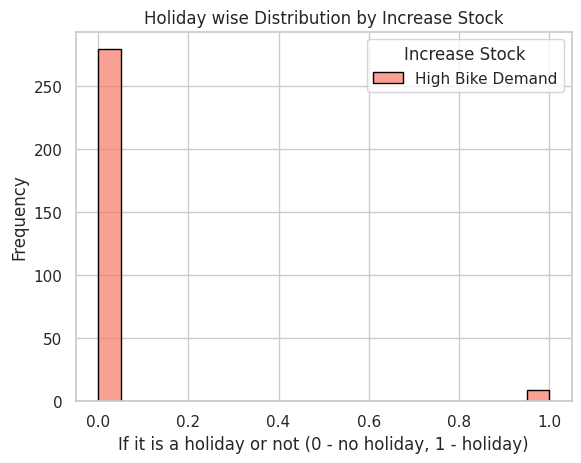

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
holiday = df['holiday']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'holiday': holiday, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
#sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='hour_of_day', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='holiday', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('If it is a holiday or not (0 - no holiday, 1 - holiday)')
plt.ylabel('Frequency')
plt.title('Holiday wise Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


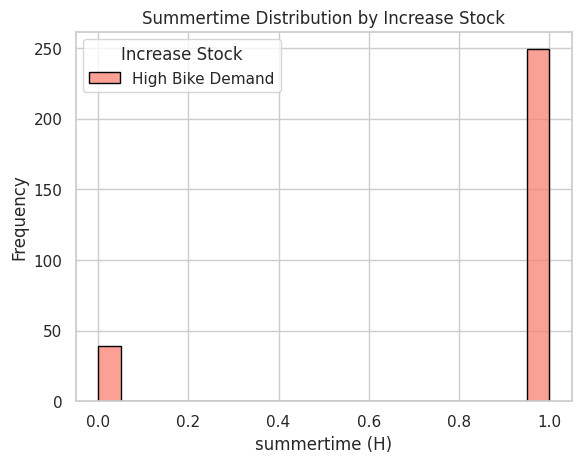

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
summertime = df['summertime']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'summertime': summertime, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='summertime', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('summertime (H)')
plt.ylabel('Frequency')
plt.title('Summertime Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


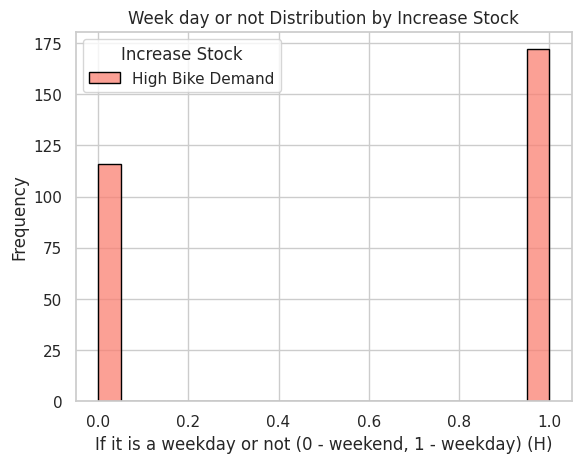

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
weekday = df['weekday']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'weekday': weekday, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='weekday', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('If it is a weekday or not (0 - weekend, 1 - weekday) (H)')
plt.ylabel('Frequency')
plt.title('Week day or not Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


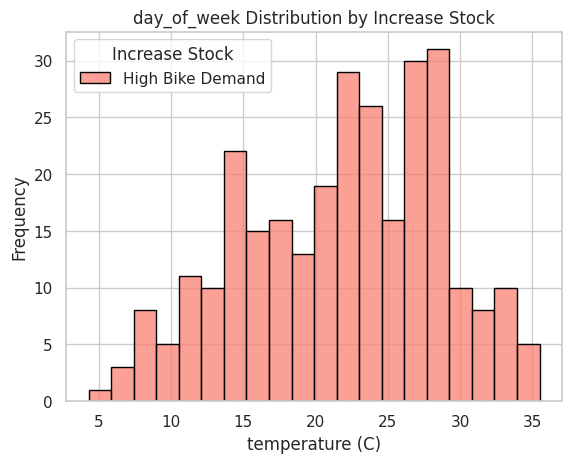

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
temp = df['temp']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'temp': temp, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
#sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='hour_of_day', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='temp', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Temperature in Celsius degrees.(C)')
plt.ylabel('Frequency')
plt.title('Temperature wise Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


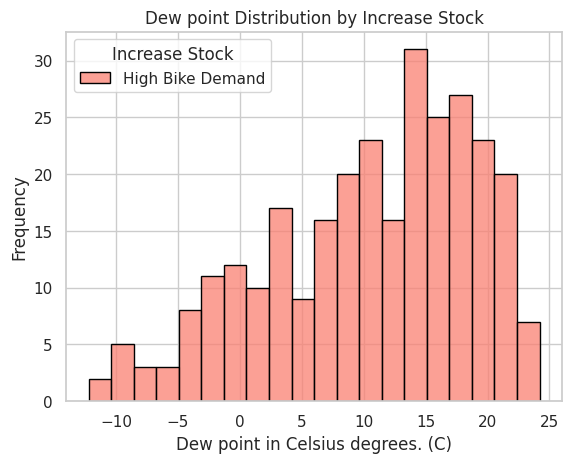

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
dew = df['dew']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'dew': dew, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
#sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='hour_of_day', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='dew', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Dew point in Celsius degrees. (C)')
plt.ylabel('Frequency')
plt.title('Dew point Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


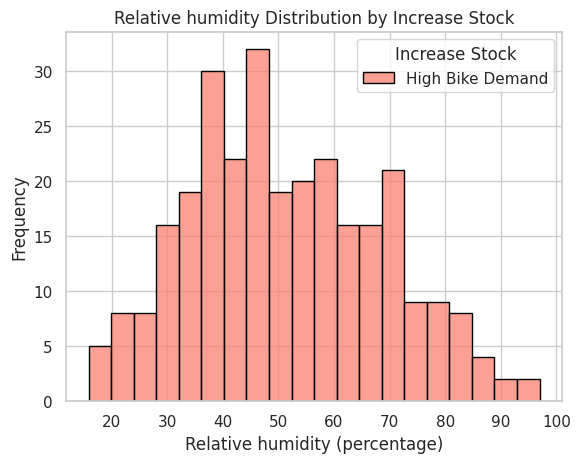

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
humidity = df['humidity']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'humidity': humidity, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
#sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='hour_of_day', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='humidity', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Relative humidity (percentage)')
plt.ylabel('Frequency')
plt.title('Relative humidity Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


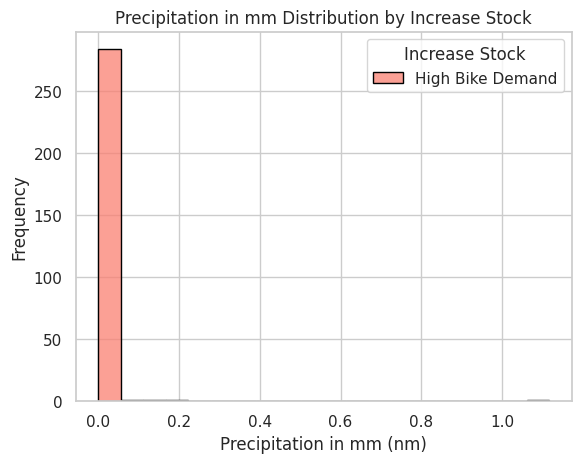

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
precip = df['precip']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'precip': precip, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='precip', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Precipitation in mm (nm)')
plt.ylabel('Frequency')
plt.title('Precipitation in mm Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


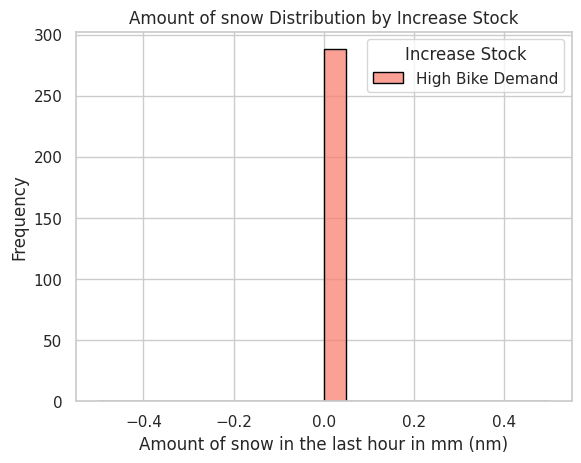

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
snow = df['snow']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'snow': snow, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='snow', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Amount of snow in the last hour in mm (nm)')
plt.ylabel('Frequency')
plt.title('Amount of snow Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


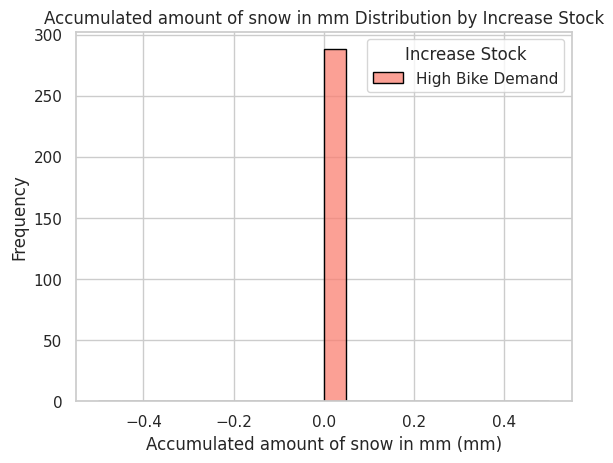

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
snowdepth = df['snowdepth']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'snowdepth': snowdepth, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='snowdepth', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Accumulated amount of snow in mm (mm)')
plt.ylabel('Frequency')
plt.title('Accumulated amount of snow in mm Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


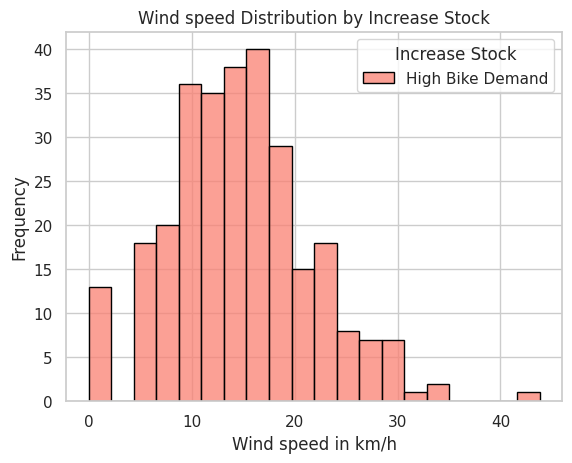

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
windspeed = df['windspeed']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'windspeed': windspeed, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='windspeed', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Wind speed in km/h')
plt.ylabel('Frequency')
plt.title('Wind speed Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


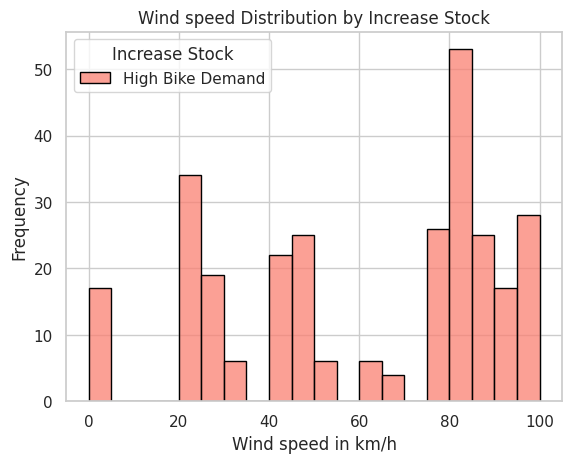

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
cloudcover = df['cloudcover']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'cloudcover': cloudcover, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='cloudcover', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Percentage of the city covered in clouds')
plt.ylabel('Frequency')
plt.title('Percentage of the city covered in clouds Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


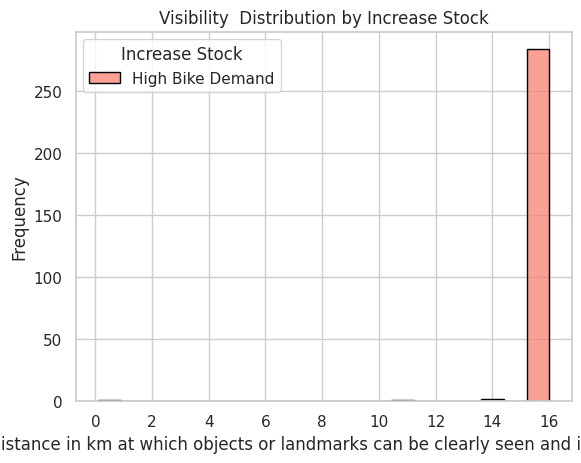

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
visibility = df['visibility']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'visibility': visibility, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='visibility', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Distance in km at which objects or landmarks can be clearly seen and identified.')
plt.ylabel('Frequency')
plt.title('Visibility  Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()
